# Modelo de Regresion Lineal

### Paso 1: Carga y revisión inicial de los datos

In [1]:
#Revisamos los datos de la tabla de la base de datos
import pandas as pd

# Cargar los datos históricos
overall_df = pd.read_csv('../../data/overall_limpio.csv')

# Visualizar las primeras filas de cada DataFrame para entender su estructura
overall_df_head = overall_df.head()

overall_df_head

c:\Users\albab\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Season,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Top Team Scorer Goals,Country
0,2022-2023,W,Manchester City,13.0,8.0,5.0,0.0,32.0,5.0,27.0,29.0,63639.0,Erling Haaland,Ederson,12.0,England
1,2022-2023,F,Inter,13.0,7.0,3.0,3.0,19.0,11.0,8.0,24.0,71415.0,Edin Džeko,André Onana,4.0,Italy
2,2022-2023,SF,Real Madrid,12.0,8.0,2.0,2.0,26.0,13.0,13.0,26.0,58761.0,Vinicius Júnior,Thibaut Courtois,7.0,Spain
3,2022-2023,SF,Milan,12.0,5.0,3.0,4.0,15.0,11.0,4.0,18.0,72546.0,Olivier Giroud,Mike Maignan,5.0,Italy
4,2022-2023,QF,Bayern Munich,10.0,8.0,1.0,1.0,22.0,6.0,16.0,25.0,75000.0,"Leroy Sané,Eric Maxim Choupo-Moting",Yann Sommer,4.0,Germany


#### Datos de los CSV

 **Equipos (overall_limpio.csv)**: Este conjunto de datos incluye información resumida de equipos en una temporada específica de la Champions League, con detalles como la temporada, el ranking final del equipo, partidos jugados, victorias, derrotas, empates, goles a favor, goles en contra, diferencia de goles, puntos, asistencia, el máximo goleador del equipo, el portero principal y los goles del máximo goleador.

### Paso 2: Identificación de Variables Clave y Visualizaciones

Algunas variables que intuitivamente se ven que son valiosas son:
* GF (goles a favor)
* GA (goles en contra)
* GD (diferencia de goles)
* Pts (puntos).

Para comprobar si estamos en lo correcto emplearemos un mapa de calor que visualiza la matriz de correlación, donde los valores más cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente. Esto nos ayudará a confirmar si las variables elegidas ('GF', 'GA', 'GD') están suficientemente correlacionadas con los 'Pts' para justificar su inclusión en el modelo.

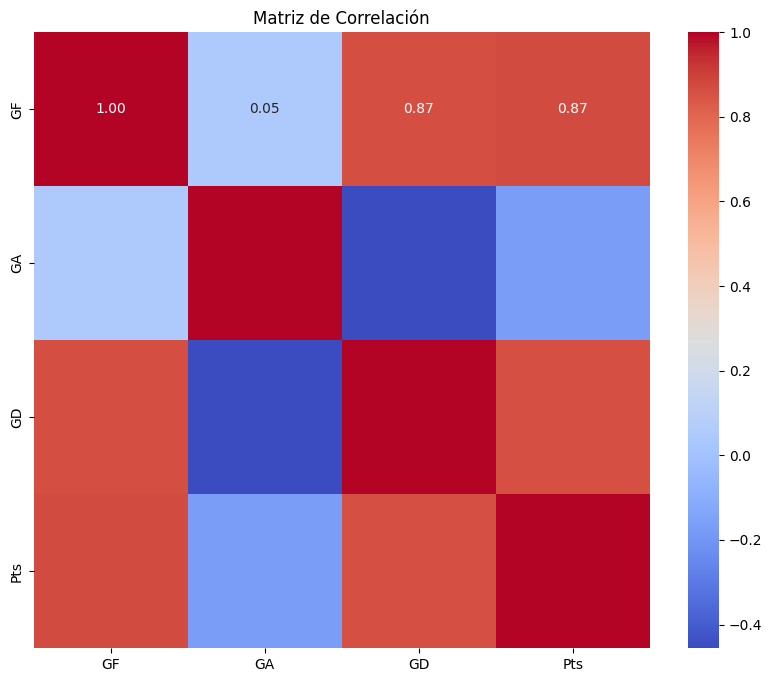

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizar la matriz de correlación
correlation_matrix = overall_df[['GF', 'GA', 'GD', 'Pts']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Matriz de Correlación')
plt.show()

### Paso 3:  Modelo de Regresión Lineal

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Seleccionar las columnas relevantes para el modelo basadas en la correlación
X = overall_df[['GF', 'GA', 'GD']]
y = overall_df['Pts']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
# Predecir los puntos en el conjunto de prueba y calcular R^2
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2:.2f}')


R^2: 0.81


#### Paso 4: Visualizamos las predicciones

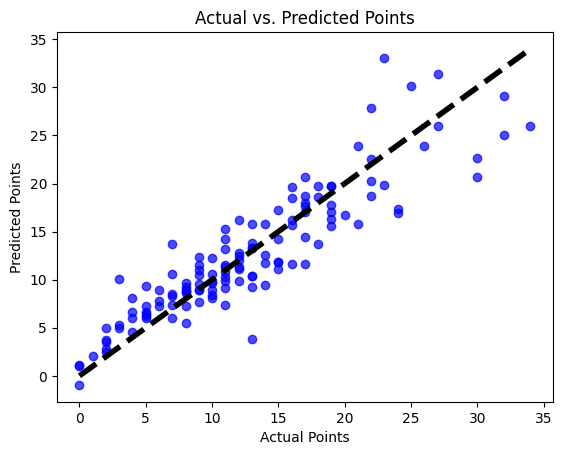

In [4]:
# Visualizar resultados reales vs. predicciones
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs. Predicted Points')
plt.show()

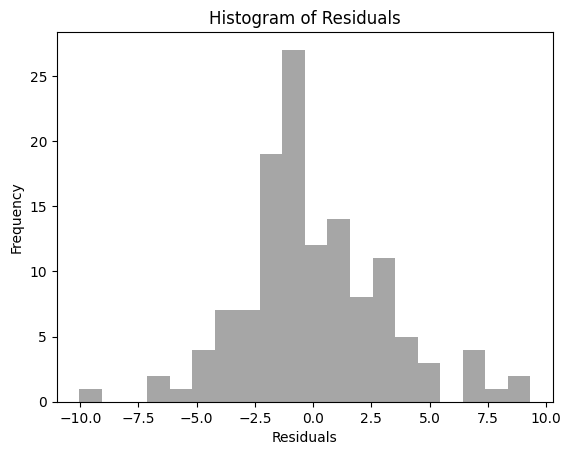

In [5]:
# Histograma de residuos
residuals = y_test - y_pred
plt.hist(residuals, bins=20, color='gray', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

#### Paso 5: Predicciones temporada actual

In [6]:
# Cargar y preparar los datos de la temporada actual
current_season_df = pd.read_csv('../../data/equipo_2023-2024_limpio.csv')
X_current_season = current_season_df[['GF', 'GA', 'GD']]

# Predecir los puntos para la temporada actual
predicted_points = model.predict(X_current_season)
current_season_df['Predicted Points'] = predicted_points

# Mostrar los resultados de la temporada actual
print(current_season_df[['Squad', 'Pts', 'Predicted Points']].head(10))

             Squad   Pts  Predicted Points
0      Real Madrid  24.0         20.673648
1    Bayern Munich  23.0         18.228985
2         Dortmund  18.0         15.549854
3        Paris S-G  17.0         17.618680
4  Manchester City  26.0         25.656073
5  Atlético Madrid  20.0         21.190854
6        Barcelona  19.0         18.135887
7          Arsenal  17.0         19.497866
8            Porto  15.0         16.442898
9            Inter  15.0         11.836310
